In [ ]:
'''
    Device Failure Prediction 첫 번째 내용입니다.
    이 프로젝트는 데이터 전처리와 Feature Engineering을 더해 가는 과정을 통해, 모델의 성능이 개선되는 
    것을 살펴보는 것이 목적입니다. 적용 대상 알고리즘은 Logistic Regression과 LightGBM입니다.
'''

In [146]:
#모델 개발에 필요한 모듈들을 모두 import합니다.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import pandas_profiling

import pandas as pd
from datetime import datetime
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

from sklearn.model_selection import StratifiedKFold

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [156]:
df = pd.read_csv('/home/mlhacker/Downloads/device.txt')

In [8]:
# 데이터 로딩이 성공적으로 이루어 졌는지 확인합니다.
df.head(5)

# 출력 상태를 보니 12개의 컬럼이 제대로 보입니다.

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [9]:
# Pandas에서 제공하는 데이터프레임에 대한 프로파일링 함수를 사용해서 데이터를 살펴볼 수 있지만,
# 여기서는 하나씩 직접 살펴보도록 하겠습니다.

In [11]:
# 널 값이 존재하는지 살펴봅니다.
df.isnull().sum()

# 결과를 보니 널 값은 없습니다.

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [12]:
# 결측치가 있는지 살펴봅니다.

df.isna().sum()
# 결과를 보니 결측지가 없습니다.

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [14]:
# 각 컬럽별 Unique한 값들의 갯수를 살펴봅니다.

df.nunique()
# 결과를 보니, 이상하게 'attribute7'과 'attribute8'이 동일한 unique값의 갯수를 가지고 있습니다.

date             304
device          1168
failure            2
attribute1    123878
attribute2       558
attribute3        47
attribute4       115
attribute5        60
attribute6     44838
attribute7        28
attribute8        28
attribute9        65
dtype: int64

<AxesSubplot:>

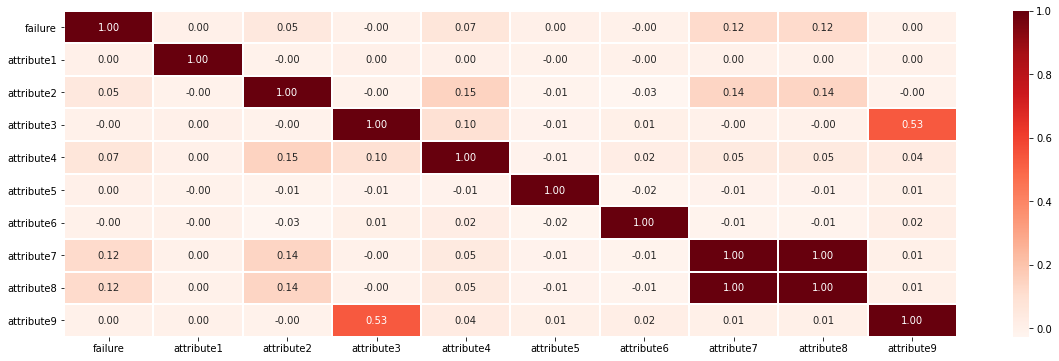

In [21]:
# attribute7과 attribute8의 unique값의 갯수가 동일하여, 상관관계를 살펴봅니다.

plt.figure(figsize=(20,6))
sns.heatmap(data = df.corr(), annot=True, fmt ='.2f', linewidths=1.0, cmap='Reds')

# 결과를 보니, 'attribute7'과 'attribute8'의 관계가 1입니다.
# 둘의 관계가 완변학 선형 관계를 이루고 있어 동일한 컬럼이 중복되어 데이터에 포함된 것 같다는 생각을 해 봅니다.

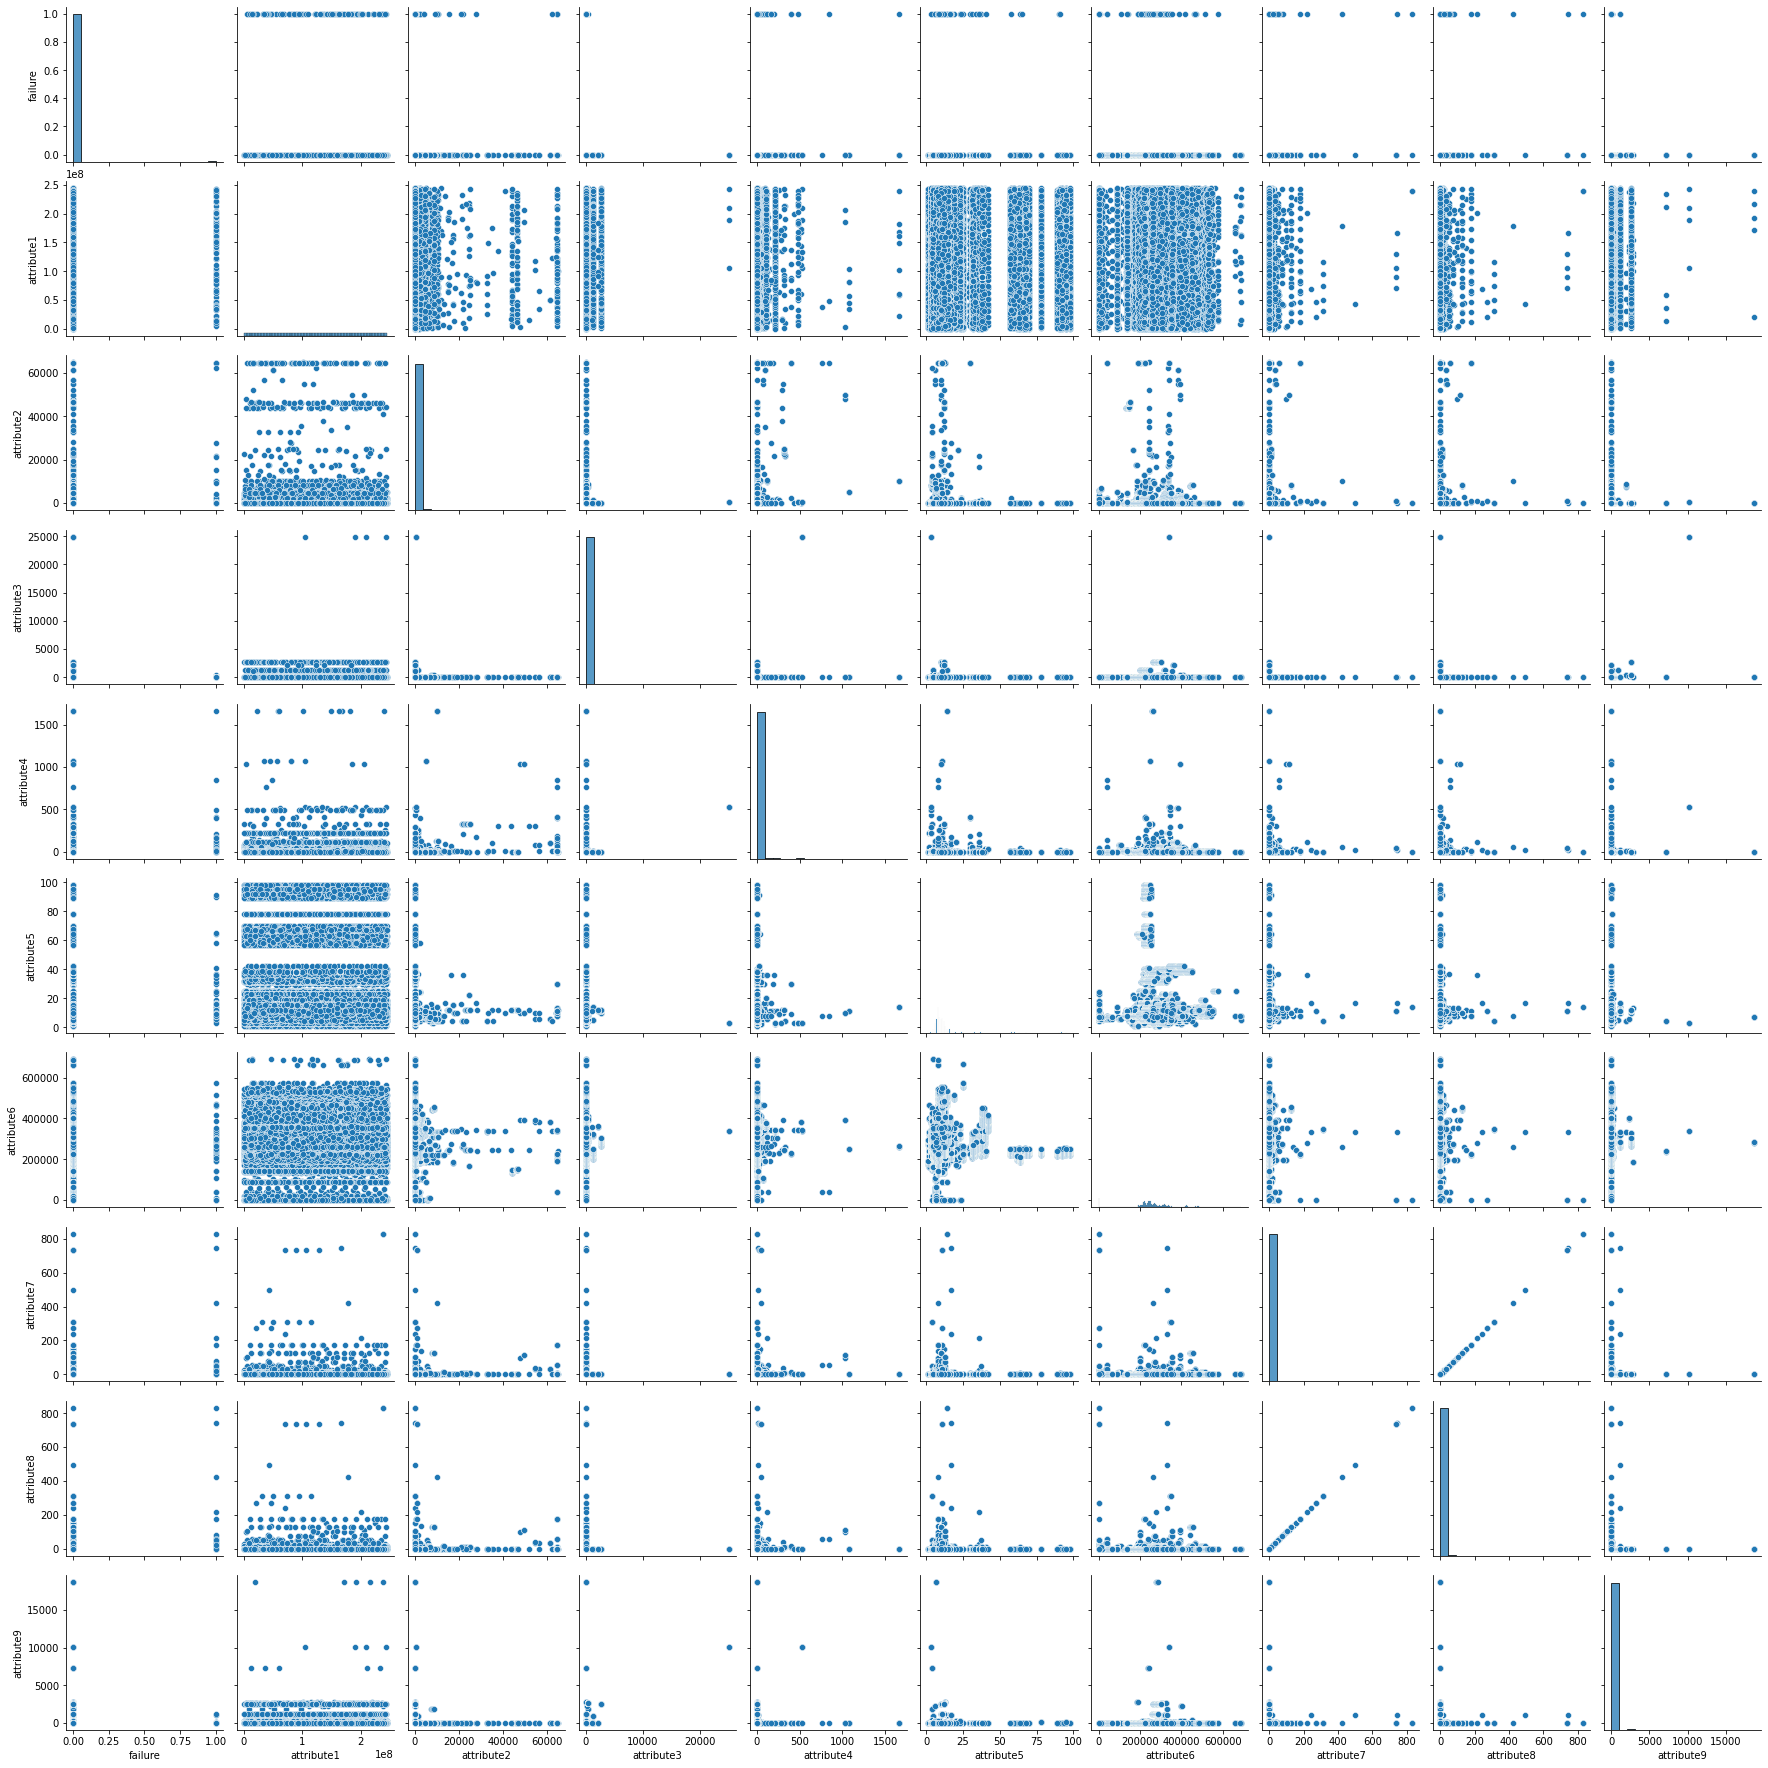

In [157]:
# 그럼, 독립 변수간의 상관 관계도 살펴보겠습니다.
sns.pairplot(df)

# 결과를 보니 'attribute7'과 'attribute8'은 완변한 선형관계를 가진다는 것을 다시 확인할 수 있습니다.

In [158]:
# 'attribute7'과 'attribute8'의 컬럼의 값들이 완전히 동일한 값으로 구성되어 있는지 확인합니다.

column_comparison = pd.DataFrame(np.where(df["attribute7"] == df["attribute8"], True, False))
column_comparison.value_counts()

# 결과값을 보니 두 컬럼이 동일한 컬럼이라는 것을 확인 할 수 있습니다.

True    124494
dtype: int64

In [ ]:
# 'attribute7'과 'attribute8' 컬럼이 동일하여, 'attribute8' 컬럼을 데이터 셑에서 제거 합니다.

df.drop('attribute8', axis=1, inplace=True)

In [163]:
df.info()
# 결과를 보니 'attribute8'이 데이터 셑에서 삭제 된 것을 확인 할 수 있습니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute9  124494 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 10.4+ MB


In [ ]:
# Box Plot을 이용하여 각 컬럼들이 가지고 있는 값들을 자세히 보도록 하겠습니다.

In [119]:
# Create Box Plots.
# Box Plot을 그릴 수가 정해져 있기 때문에 하드 코딩으로 진행 합니다.
def box_plots(df):
    f, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))
    columns = [x for x in df.columns if x != 'failure' and x != 'date' and x != 'device']
    col = 0
    for r in range(2):
        for i in range(4):
            sns.boxplot(x=df.failure, y=columns[col], data=df, ax=axes[r][i])
            axes[r][i].set_title(columns[col] + ' vs Failure')
            col += 1

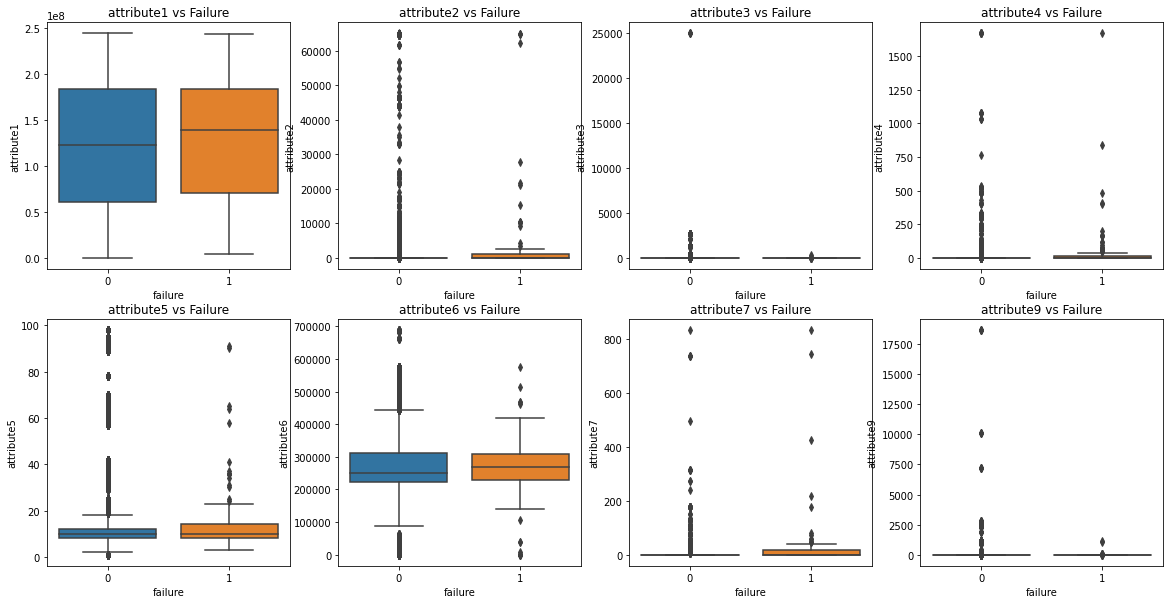

In [120]:
# Box Plot을 이용해서 확인 함.
box_plots(df)

In [121]:
# 'attribute2, 'attribute4', 'attribute5' 와 attribute7'을 제외한 나머지 변수들은 타겟 변수에 대한 
# 투렷한 분포의 차이를 보이지 않습니다.

In [187]:
# 데이터 분포를 살펴보도록 하겠습니다.
def distribution_plots(df):
    f, axes = plt.subplots(2, 4, figsize=(20,10))
    columns = [x for x in df.columns if x != 'failure' and x != 'date' and x != 'device']
    col = 0
    for r in range(2):
        for i in range(4):
            sns.distplot(df[columns[i]], ax=axes[r][i], color='r')
            axes[r][i].set_title(columns[col])
            col += 1

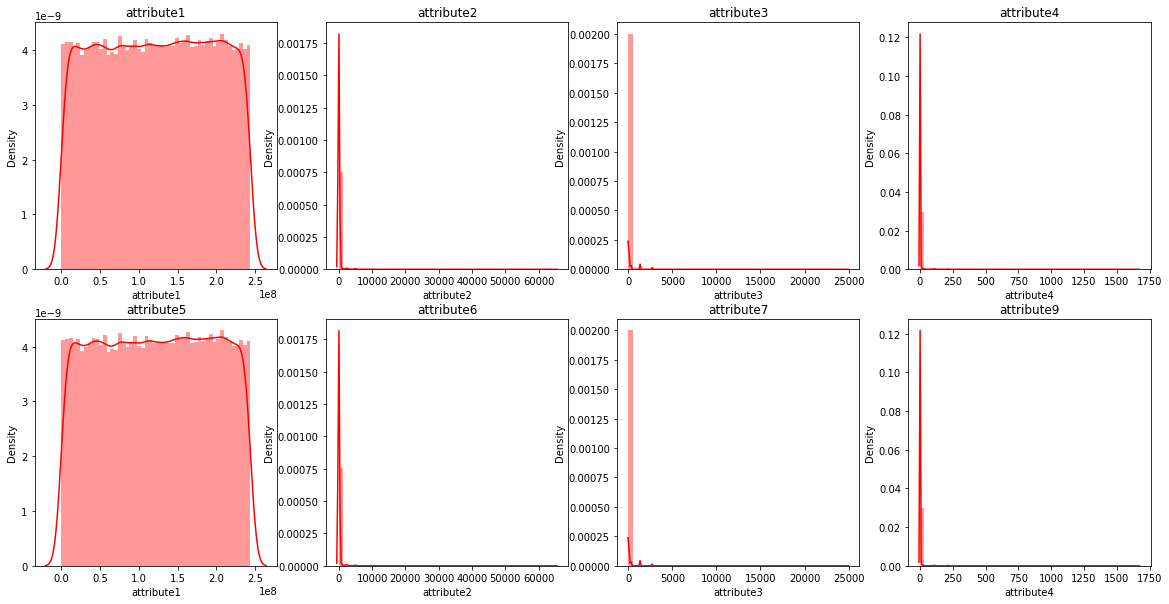

In [188]:
distribution_plots(df)

In [153]:
# 'attribute1'과 'attribute5'의 경우는 균등분포의 성격을 띄고 있는 반면에, 나머지 모든 컬럼들이 Left-Skewed 분포라는 것을 
# 확인할 수 있습니다. 

In [164]:
# 주어진 데이터 셑에 아무런 전처리 작업이나 Feature Engineering을 하지 않고 모든 변수를 선택했을 때, 모델의 성능을
# 기대하기 어려울 것 같지만, 현재 상태에서 어떤 결과를 얻을 수 있는지 보는 것도 좋을 것 같습니다.

In [178]:
# 그럼 현재 상태에서 모델 개발을 위해, 독립변수들과 타겟 변수들의 데이터 셑으로 분리를 합니다.
# 독립 변수에서 'date'와 'device'은 수치 데이터가 아닌 관계로 일단 제외 시킵니다. 
X = df.iloc[:, 3:]
Y = df.loc[:, 'failure']

In [184]:
X.shape

(124494, 8)

In [185]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   attribute1  124494 non-null  int64
 1   attribute2  124494 non-null  int64
 2   attribute3  124494 non-null  int64
 3   attribute4  124494 non-null  int64
 4   attribute5  124494 non-null  int64
 5   attribute6  124494 non-null  int64
 6   attribute7  124494 non-null  int64
 7   attribute9  124494 non-null  int64
dtypes: int64(8)
memory usage: 7.6 MB


In [183]:
Y.shape

(124494,)

In [194]:
# 모델 생성에 필요한 Scikit-Learn 라이브러리 import.
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

In [190]:
# 모델 생성 함수 정의
# 모델 생성 함수 
def modeling(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    metrics(Y_test, pred)

In [200]:
# 모델 평가 함수 정의
def metrics(Y_test, pred):
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred) 
    f1 = f1_score(Y_test, pred)
    roc_score = roc_auc_score(Y_test, pred, average='macro')
    print ('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2: .4f}'.format(accuracy, precision, recall))
    print ('f1-score: {0:.4f}, auc: {1:.4f}'.format(f1, roc_score))

In [211]:
# tested on RandomForestClassifier
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=42)

In [212]:
Y_test.value_counts()

0    24881
1       18
Name: failure, dtype: int64

In [213]:
Y_test.value_counts()/Y_test.count()*100

0    99.927708
1     0.072292
Name: failure, dtype: float64

In [214]:
# 모델을 새로 추가된 컬럼들을 이용해서 다시 측정해 봄.
lr = LogisticRegression(max_iter=1000) # 로지스틱 리그레션 모델.
modeling(lr, X_train, X_test, Y_train, Y_test)

정확도: 0.9993, 정밀도: 0.0000, 재현율:  0.0000
f1-score: 0.0000, auc: 0.5000


/home/mlhacker/anaconda3/envs/tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 결과를 보면 정밀도와 재현율이 0.00 이고, f1-score 또한 0입니다.
# 그런데 정확도는 0.9993으로 거의 100%입니다. 이렇게 데이터 셑이 imbalanced한 경우에 정확도를 보고 판단하기에는 무리가 있습니다. 
# 예상한 데로 결과가 엉망입니다. 
# 다음 파트에서는  Cross-validation을 적용해서 다시 결과를 보도록 하겠습니다.